![logo](https://climate.copernicus.eu/sites/default/files/2025-03/logoline_c3s.png)

# The Total Solar Irradiance (TSI) from RMIB

**This notebook can be run on free online platforms, such as Binder, Kaggle and Colab, or they can be accessed from GitHub. The links to run this notebook in these environments are provided here, but please note they are not supported by ECMWF.** 

[![binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/ecmwf-training/c3s-training-submodule-sat-obs-atmos-physics/main?labpath=total-solar-irradiance.ipynb)
[![kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/ecmwf-training/c3s-training-submodule-sat-obs-atmos-physics/blob/main/total-solar-irradiance.ipynb)
[![colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ecmwf-training/c3s-training-submodule-sat-obs-atmos-physics/blob/main/total-solar-irradiance.ipynb)
[![github](https://img.shields.io/badge/Open%20in-GitHub-black?logo=github)](https://github.com/ecmwf-training/c3s-training-submodule-sat-obs-atmos-physics/blob/main/total-solar-irradiance.ipynb)

## Learning objectives 🎯

This notebook provides a practical introduction to the Total Solar Irradiance (TSI) dataset available at the Copernicus Climate Change Service (C3S) [Climate Data Store (CDS)](https://cds.climate.copernicus.eu/)).

The Total Solar Irradiance (TSI) is the measure of the energy input that the Earth receives from the Sun. It is the dominant driver of the Earth's climate, a key component of the Earth’s Radiation Budget (ERB), and is thus one of the Global Climate Observing System (GCOS) Essential Climate Variables (ECVs). Stable and accurate long-term TSI records are needed for climate studies, e.g. to understand the influence of solar variability on climate.
    
The TSI exhibits large day-to-day variations due to the passage of dark sunspots, and bright faculae. The well-known 11-year solar cycle is also being directly observed by space-based instruments. There exist other regular and irregular factors that contribute to the short-term variations of TSI. Fortunately, the TSI is very stable in the long timescales, century to multi-century (thus the historical name "the solar constant", now usually referred to as Total Solar Irradiance (TSI)).

The notebook provides instructions for setting up and running the code, describes the steps to set up a python environment, and access and prepare the data. Following this setup, the notebook presents two practical use cases of the dataset: plotting the TSI daily values and a 12-month rolling mean (Use Case 1), and plotting two TSI datasets side-by-sides (Use Case 2).

The figure below is the result of Use Case 1, and the result of a successful run of the code.

![](./img/tsi_banner.png)

## Prepare your environment

### Set up CDSAPI and your credentials

The code below will ensure that the `cdsapi` package is installed. If you have not setup your `~/.cdsapirc` file with your credenials, you can replace `None` with your credentials that can be found on the [how to api](https://cds.climate.copernicus.eu/how-to-api) page (you will need to log in to see your credentials).

In [ ]:
!pip install -q cdsapi
# If you have already setup your .cdsapirc file you can leave this as None
cdsapi_key = None
cdsapi_url = None

### (Install and) Import libraries

We need to import the libraries to ensure that all necessary functions and modules are available for use throughout the script's execution.

In [2]:
# CDS API library
import cdsapi

# Library for data manipulation and analysis
import pandas as pd

# Libraries to work with zip-archives, pattern expansion, operating system interfaces
import zipfile
import glob
import os

# Library for plotting and visualising data
import matplotlib.pyplot as plt

### Specify data directory

In [ ]:
# Directory to store data
# Please ensure that datadir is a location where you have write permissions
DATADIR = './data_dir/'
# Create this directory if it doesn't exist
os.makedirs(DATADIR, exist_ok=True)

## Explore data

This TSI dataset provides daily TSI observations for over 44 years. It is a composite dataset, meaning that it is constructed from different TSI measurements obtained by an ensemble of space instruments, and carefully combined into one homogeneous dataset.

This dataset is produced on behalf of C3S by the Royal Meteorological Institute of Belgium (RMIB).

Please find further information about the dataset as well as the data in the Climate Data Store catalogue entry Earth's Radiation Budget, sections "Overview", "Download data" and "Documentation": 
- [Earth's Radiation Budget from 1979 to present derived from satellite observations](https://cds.climate.copernicus.eu/datasets/satellite-earth-radiation-budget?tab=overview)

### Search for data

To search for data, visit the CDS website: [https://cds.climate.copernicus.eu/](https://cds.climate.copernicus.eu/).
Here you can search for TSI data using the search bar. The data we need for this use case is the [Earth's Radiation Budget from 1979 to present derived from satellite observations](https://cds.climate.copernicus.eu/datasets/satellite-earth-radiation-budget?tab=overview).
The Earth Radiation Budget (ERB) comprises the quantification of the incoming radiation from the Sun and the outgoing reflected shortwave and emitted longwave radiation. This catalogue entry comprises data from a number of sources.

Having selected the correct catalogue entry, we now need to specify what origin, variables, temporal and geographic coverage we are interested in. 
These can all be selected in the **"Download data"** tab. In this tab, a form appears in which we will select the following parameters to download:

:::{dropdown} Parameter of data to download

- Product family: `TSI (Total Solar Irradiance)`
- Origin: `RMIB (Royal Meteorological Institute of Belgium)`
- Variable: `Total Solar Irradiance (TSI)`
- Climate data record type: `Interim Climate Data Record (ICDR)`
- Time aggregation: `Daily mean`
- Format: `Compressed zip file (.zip)`

:::

At the end of the download form, select "Show API request". This will reveal a block of code, which you can simply copy and paste into a cell of your Jupyter Notebook (see cell below). Having copied the API request into the cell below, running this will retrieve and download the data you requested into your local directory.

::: {warning}

Please remember to accept the terms and conditions of the dataset, at the bottom of the CDS download form!

:::

### Download the data

With the API request copied into the cells below, running these cells will retrieve and download the data you requested into your local directory.

In [ ]:
c = cdsapi.Client()

c.retrieve(
    'satellite-earth-radiation-budget',
    {
        'variable': 'total_solar_irradiance',
        'product_family': 'tsi',
        'origin': 'rmib',
        'climate_data_record_type': 'interim_climate_data_record',
        'time_aggregation': 'daily_mean',
        'format': 'zip',
    },
    f'{DATADIR}TSI_data.zip')


2024-12-17 13:19:48,325 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
2024-12-17 13:19:48,325 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2024-12-17 13:19:48,326 INFO [2024-09-16T00:00:00] Remember that you need to have an ECMWF account to use the new CDS. **Your old CDS credentials will not work in new CDS!**
2024-12-17 13:19:48,326 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using t

51854141a6df6351fd056322a00069e.zip:   0%|          | 0.00/3.36M [00:00<?, ?B/s]

'./data_dir/TSI_data.zip'

### Unpack the data

We use `zipfile` module to extract the content of the archive we just downloaded. The file is extracted into the specified directory path, represented by the `DATADIR` variable.

In [6]:
with zipfile.ZipFile(f'{DATADIR}TSI_data.zip', 'r') as zip_ref:
    zip_ref.extractall(f'{DATADIR}')

## Use case 1: time series of the Total Solar Irradiance (TSI)

In this learning material, we visualize the time evolution of the Total Solar Irradiance (TSI) using daily values and a 12-month rolling mean. This visualization helps us understand the variations in TSI over time.

### Load dataset, subselect and calculate a temporal mean

First, we need to read the file and prepare the dataset for analysis and plotting.

The TSI data is stored in an ASCII file. We use `pandas` to read the file. The TSI dataset is constantly updated, which is why we need to use glob to get the latest filename.

We read a dataset file specified by the filename variable using pandas `pd.read_csv()` into the DataFrame. The file has a header with 128 lines of metadata that is skipped during the reading process. We extract columns 1 and 2 (starting from zero) from the CSV file, naming them as "TSI" and "JD" respectively, and set the "JD" column as the DataFrame's index. The "JD" column contains special dates called Julian days, which are a way to represent time. The Julian day is the continuous integer count of days, it is used for easily calculating elapsed days between two events.

As the next, we convert these Julian days to a datetime format using `pd.to_datetime()` and set units as Date.
Finally, we use lambda-function to set the time to midnight (00:00:00) for each date, effectively discarding the time information, and leaving only the date component in the index.

In [8]:
filename = glob.glob(f'{DATADIR}C3S_RMIB_daily_TSI_composite_ICDR*.txt')[0]

# read the file
data = pd.read_csv(
    filename, header=128, sep=' ', usecols=[1, 2], names=["TSI", "JD"], index_col=1, encoding= 'unicode_escape'
)
# convert julian date values to a datetime format
data.index = pd.to_datetime(data.index, origin='julian', unit='D')
# set time to midnight using lambda-function
data.index = data.index.map(lambda x: x.replace(hour=0, minute=0, second=0))

# See a preview of the data in the dataframe
data

TSI
JD                   
1979-01-02  1361.7817
1979-01-03  1361.6006
1979-01-04  1361.7154
1979-01-05  1361.6306
1979-01-06  1361.7739
...               ...
2023-12-27  1362.5843
2023-12-28  1362.5490
2023-12-29  1362.4397
2023-12-30  1362.3251
2023-12-31  1362.2454

[16435 rows x 1 columns]

### Print header information to learn about the dataset

The header contains general information about the dataset, satellite instruments used to create a composite dataset, and columns are explained. A peer-reviewed article by [Dewitte et al, 2016](#dewitte) describes the dataset in detail. The Product User Guide and Specification (PUGS, [Clerbaux et al, 2023](#clerbaux)) provides the information a user should need for an appropriate use of the TSI data.

In [9]:
# read the dataset metadata from the header
with open(filename, 'r') as file:
    header_lines = [next(file) for _ in range(128)]

print(''.join(header_lines))

# Copernicus Climate Change Service (C3S) daily Total Solar Irradiance (TSI) timeseries
# 
# The TSI is the total amount of solar radiation, i.e. integrated over all the wavelengths, at the mean  
# Earth-Sun distance (1 AU). Given its direct impact on the Earth Radiation Budget (ERB), it is one of  
# the Essential Climate Variables (ECV) defined by the GCOS. 
# 
# This C3S timeseries provides an estimate of the daily TSI computed as a composite of different
# space instruments (see list below). 
# 
# CDR type     : ICDR (Interim Climate Data Record)
# CDR version  : v3.2
# 
# CDR provider : Royal Meteorological Institute of Belgium (RMIB)
# Contract     : C3S2_312a_lot1                                
# 
# Temporal resolution   : daily mean
# CDR (final) period    : 19790101 - 20201231
# ICDR (interim) period : 20210101 - 20231231
# 
# Creation date and time (YYYYMMDD_hhmmss) : 20240320_155857
# Software version                         : v3.0
# 
# Instruments and models :
# ---------

### Plot data

We want to save objects `figure` and `axes` to use later. We use [Matplotlib](https://matplotlib.org/stable/index.html) to create a high-quality plot. Before plotting we need to prepare daily values and a 12-month rolling mean.

The rolling mean is a statistical technique used to smooth out data by calculating the average of a specified window of values. In our case, the window is 365 days or 12 months.  

By applying the rolling mean to the TSI dataset spanning from 1979 to 2023, we can clearly observe the presence of three distinct solar cycles. These cycles represent periods of varying solar activity and are characterized by the rise and fall of sunspot numbers and other solar phenomena. Solar cycle 22, spanning from 1986 to 1996, is followed by solar cycle 23, which occurred from 1996 to 2008. Finally, solar cycle 24 took place from 2008 to 2019. These solar cycles demonstrate the cyclic nature of solar activity and its influence on the TSI measurements.


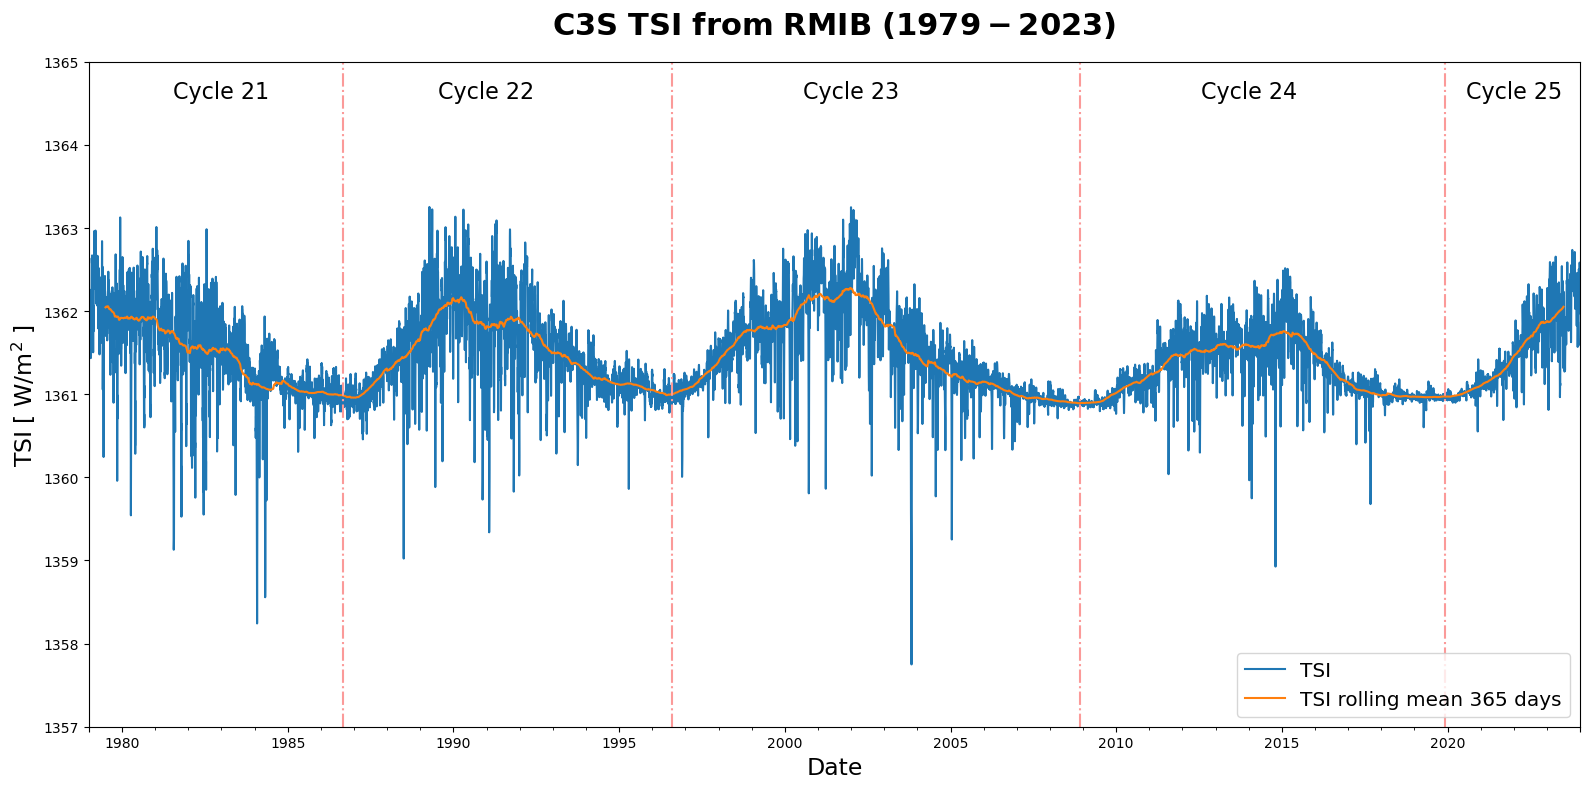

In [10]:
# Save figure and axes objects to modify later
fig1, ax1 = plt.subplots(1, 1, figsize=[16, 8])

# Actual plotting of the data
data.TSI.rolling(window=1).mean().plot()
data.TSI.rolling(window=365, center=True).mean().plot(legend=True)

# Adding title, x,y labels, and legend at lower right corner
ax1.set_ylim(1357, 1365)
ax1.set_title('$\\bf{C3S\\ TSI\\ from\\ RMIB\\ (1979-2023)}$',fontsize=22, pad = 20)
ax1.set_ylabel('TSI [ W/m$^2$ ]', fontsize=17)
ax1.set_xlabel('Date', fontsize=17)
ax1.legend(["TSI", "TSI rolling mean 365 days"], loc="lower right", fontsize='x-large')

# Adding vertical lines and labels to distinguish solar cycles
ax1.axvline(pd.to_datetime('1986-09-01'), color="#fb9a99", linestyle="-.")
ax1.axvline(pd.to_datetime('1996-08-01'), color="#fb9a99", linestyle="-.")
ax1.axvline(pd.to_datetime('2008-12-01'), color="#fb9a99", linestyle="-.")
ax1.axvline(pd.to_datetime('2019-12-01'), color="#fb9a99", linestyle="-.")
ax1.text(pd.to_datetime('1983-01-01'), 1364.5, "Cycle 21", ha="center", va="bottom", color="k", fontsize=16)
ax1.text(pd.to_datetime('1991-01-01'), 1364.5, "Cycle 22", ha="center", va="bottom", color="k", fontsize=16)
ax1.text(pd.to_datetime('2002-01-01'), 1364.5, "Cycle 23", ha="center", va="bottom", color="k", fontsize=16)
ax1.text(pd.to_datetime('2014-01-01'), 1364.5, "Cycle 24", ha="center", va="bottom", color="k", fontsize=16)
ax1.text(pd.to_datetime('2022-01-01'), 1364.5, "Cycle 25", ha="center", va="bottom", color="k", fontsize=16)

plt.tight_layout()
plt.show()

# and save the figure
fig1.savefig('Example_1_TSI_timeseries.png', dpi=300, bbox_inches='tight')

## Use case 2: side-by-side composite products


The existing 44+ year TSI Climate Data Record (CDR) is the result of several overlapping TSI instruments onboard different satellites. Another well-known composite TSI data are produced by the Naval Research Laboratory (NRL). Each organization collects TSI measurements from various satellite instruments and combines them to create a composite dataset that represents the overall TSI variations over time. In this usecase, we will plot these two composite datasets side-by-side.

### Download the NRL dataset

The NRL TSI dataset is made available through LaTiS, which is a data-serving system. It offers multiple methods to access the dataset, providing users with different options to retrieve the data according to their needs or preferences. We then download the selected parameters using a command-line utility `wget`.

* `nrl2_tsi_P1D.csv`: TSI daily dataset name on the LaTiS server;
* `?time,irradiance`: These are the variables that are requested from the dataset: time and irradiance;
* `&formatTime(yyyyMMdd)`: This is a LaTiS function that formats the time variable as a date string in the format yyyyMMdd.
* `&time>=1979-01-01T00:00`: This is another LaTiS function that specifies that you only want data points that have a time value greater than or equal to 1979-01-01T00:00

In [14]:
# download the dataset using wget. -O specifies the output path and filename; -q quiet mode, to disable wget's output
import requests
url = 'https://lasp.colorado.edu/lisird/latis/dap/nrl2_tsi_P1D.csv?time,irradiance&formatTime(yyyyMMdd)&time>=1979-01-01T00:00'
response = requests.get(url)
with open(f'{DATADIR}nrl.csv', 'wb') as file:
    file.write(response.content)


### Load dataset, subselect and calculate a temporal mean

If you run the Use case 1, C3S RMIB dataset is already saved in the memory. If not, please run the Use case 1 first.<br>  
The TSI data is stored in an ASCII file.
We read a dataset using pandas `pd.read_csv()` into DataFrame. We skip the first line, as it is the name of the columns. We also specify the date format for the first column.

In [12]:
filename_nrl = f'{DATADIR}nrl.csv'
# read the file
data_nrl = pd.read_csv(
    filename_nrl, header=1 ,sep=',', index_col=0, names=["Date", "TSI"], 
    parse_dates=[0], date_format='%Y%m%d'
)

### Plot data

We use [Matplotlib](https://matplotlib.org/stable/index.html) to create a high-quality plot. We follow the same steps, as in the first use case to plot these two datasets side-by-side.

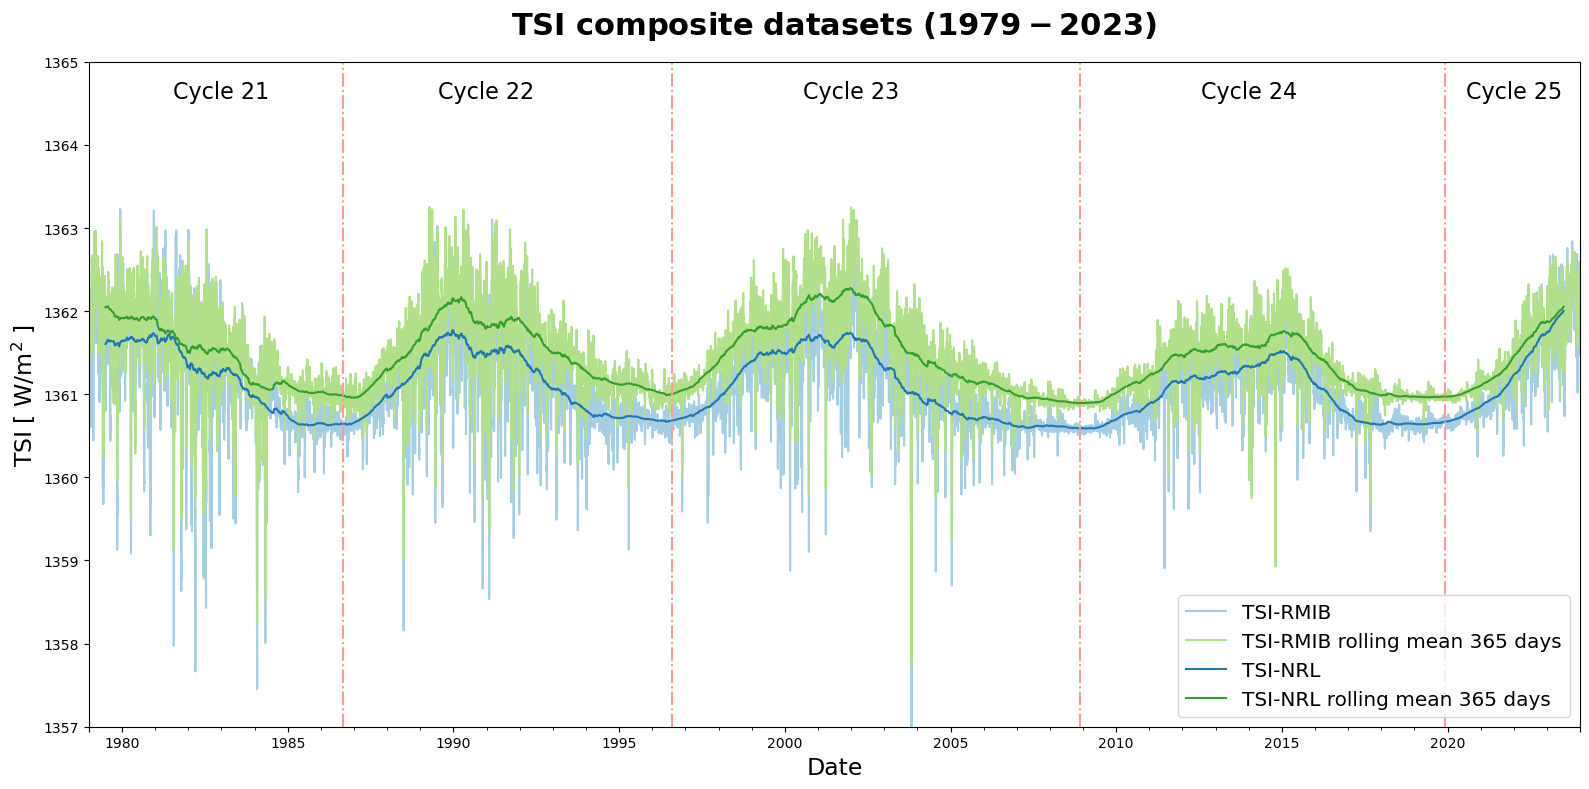

In [13]:
from matplotlib.font_manager import FontProperties

# Save figure and axes objects to modify later
fig2, ax2 = plt.subplots(1, 1, figsize=[16, 8])

# Actual plotting of the NRL data and the RMIB data
data_nrl.TSI.rolling(window=1).mean().plot(ax=ax2, color="#a6cee3")
data.TSI.rolling(window=1).mean().plot(ax=ax2, color="#b2df8a")
# Then 12-month rolling mean
data_nrl.TSI.rolling(window=365, center=True).mean().plot(ax=ax2, color="#1f78b4")
data.TSI.rolling(window=365, center=True).mean().plot(ax=ax2, color="#33a02c")


# Adding title, x,y labels, and legend at lower right corner
ax2.set_ylim(1357,1365)
ax2.set_title('$\\bf{TSI\\ composite\\ datasets\\ (1979-2023)}$',fontsize=22, pad = 20)

ax2.set_ylabel('TSI [ W/m$^2$ ]',fontsize=17,)
ax2.set_xlabel('Date',fontsize=17)
ax2.legend(
    ["TSI-RMIB", "TSI-RMIB rolling mean 365 days", "TSI-NRL", "TSI-NRL rolling mean 365 days"], 
    loc="lower right", 
    fontsize='x-large'
)

# Adding vertical lines and labels to distinguish solar cycles
ax2.axvline(pd.to_datetime('1986-09-01'), color="#fb9a99", linestyle="-.")
ax2.axvline(pd.to_datetime('1996-08-01'), color="#fb9a99", linestyle="-.")
ax2.axvline(pd.to_datetime('2008-12-01'), color="#fb9a99", linestyle="-.")
ax2.axvline(pd.to_datetime('2019-12-01'), color="#fb9a99", linestyle="-.")
ax2.text(pd.to_datetime('1983-01-01'), 1364.5, "Cycle 21", ha="center", va="bottom", color="k", fontsize=16)
ax2.text(pd.to_datetime('1991-01-01'), 1364.5, "Cycle 22", ha="center", va="bottom", color="k", fontsize=16)
ax2.text(pd.to_datetime('2002-01-01'), 1364.5, "Cycle 23", ha="center", va="bottom", color="k", fontsize=16)
ax2.text(pd.to_datetime('2014-01-01'), 1364.5, "Cycle 24", ha="center", va="bottom", color="k", fontsize=16)
ax2.text(pd.to_datetime('2022-01-01'), 1364.5, "Cycle 25", ha="center", va="bottom", color="k", fontsize=16)

plt.tight_layout()
plt.show()

# and save the figure
fig2.savefig('Example_2_TSI_SideBySide.png', dpi=300, bbox_inches='tight')

## Get more information about Earth radiation budget:

- [About Earth's radiation budget from 1979 to present derived from satellite observations](https://cds.climate.copernicus.eu/datasets/satellite-earth-radiation-budget?tab=overview)
- [About the Climate Data Store](https://cds.climate.copernicus.eu/)

## Acknowledgments

The results presented in this document rely on data from the Naval Research Laboratory Total Solar Irradiance 2 (NRLTSI2) model described in [Coddington et al. 2016](https://doi.org/10.1175/BAMS-D-14-00265.1). These data were accessed via the [LASP Interactive Solar Irradiance Datacenter (LISIRD)](https://lasp.colorado.edu/lisird/).

## References

Clerbaux N., (2023) Earth Radiation Budget TSI TOA. Copernicus Climate Change Service. https://confluence.ecmwf.int/x/AFMiEg

Dewitte, S., & Nevens, S. (2016). The Total Solar Irradiance Climate Data Record. The Astrophysical Journal, 830(1), 25. https://doi.org/10.3847/0004-637X/830/1/25.

Clerbaux, N., Velazquez Blazquez, A. (RMIB), 2023, C3S Earth Radiation Budget TSI Service: Product User Guide and Specification. Copernicus Climate Change Service, Document ref. C3S2_D312a_Lot1.2.2.6-v1.0_202303_PUGS_ECVEarthRadiationBudget_v1.1
https://confluence.ecmwf.int/x/KFMiEg